## Learning and Predicting Chaos Using LSTM RNNs

In [128]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [129]:

import numpy as np
from scipy import integrate
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation


In [130]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM, SimpleRNN
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

## Generate Time Series using the Lorenz System of DE

In [131]:

def solve_lorenz_graph(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('on')
    SEQUENCE_SIZE = 100         # length of the sequence to generate
    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    # Label the axes
    ax.set_title('The Lorenz Attractor')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
       # print(x, y, z) #print the data
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [132]:
def solve_lorenz(N=10, max_time=4.0, sigma=10.0, beta=8.0/3, rho=28.0):
    
    #define ODE function we need to solve
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose N random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    # First generate a list of time steps starting at zero and going to max_time. 250 steps for each time unit
    t = np.linspace(0, max_time, int(250*max_time))
    # Second integrate the ODE using the lorenz_deriv funtion above for each random starting point
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])

    return t, x_t

In [133]:
sigma=10.0
beta=8.0/3
rho=28.0
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    """Compute the time-derivative of a Lorenz system."""
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


In [134]:
#print (t)

In [135]:

N=5
max_time = 4.0
#original code generated an array of starting points
x0 = -15 + 30 * np.random.random((N, 3))
print (x0)
# generate one random starting point at a time
point1 = np.random.random(3)
print ("Random point1 = ",point1)

sigma = 10.0
beta = 8.0/3
rho = 28.0

# Solve for the trajectories
# First generate a list of time steps starting a zero and going to max_time. 250 steps for each time unit
t = np.linspace(0, max_time, int(250*max_time))
print ("shape of t = ", t.shape)
#print (" t = " , t)

# Second integrate the ODE using the lorenz_deriv funtion above
#lor1 = integrate.odeint(lorenz_deriv, point1, t, sigma, beta, rho)
lor1 = integrate.odeint(lorenz_deriv, point1, t)
print (" lor1 = ", lor1)
print ("shape of lor1 = ", lor1.shape)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point2 = -15 + 30 * np.random.random(3)
lor2 = integrate.odeint(lorenz_deriv, point2, t)

# Do it with a different random starting point-- integrate the ODE using the lorenz_deriv funtion above
point3 = -15 + 30 * np.random.random(3)
lor3 = integrate.odeint(lorenz_deriv, point3, t)

#x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
#                   for x0i in x0])

[[ -5.93002282 -10.59732328 -12.22984216]
 [ -9.41219366  -4.63317819  -3.09697577]
 [  1.16450202  -2.42416457   5.55658501]
 [ -8.86643251  11.34352309 -14.1783722 ]
 [  5.11402531  -2.48085593   1.76069485]]
Random point1 =  [0.14038694 0.19810149 0.80074457]
shape of t =  (1000,)
 lor1 =  [[ 0.14038694  0.19810149  0.80074457]
 [ 0.14293995  0.21270512  0.79235609]
 [ 0.14597071  0.2275588   0.78406747]
 ...
 [-7.82862901 -9.1788647  24.21092456]
 [-7.88324178 -9.26065108 24.24226141]
 [-7.9389106  -9.34188415 24.27785896]]
shape of lor1 =  (1000, 3)


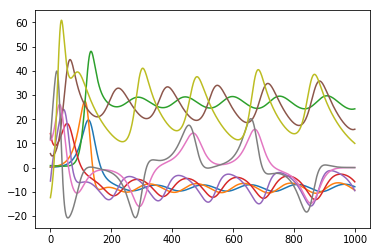

In [136]:
# from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(lor1)
plt.plot(lor2)
plt.plot(lor3)

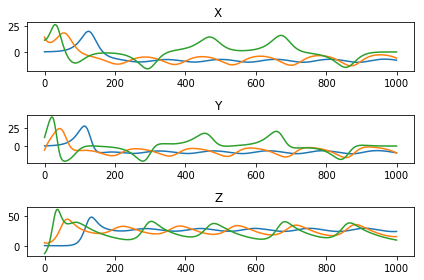

In [137]:
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(lor1[:,0:1] )
plt.plot(lor2[:,0:1] )
plt.plot(lor3[:,0:1] )
#plt.show()

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(lor1[:,1:2] )
plt.plot(lor2[:,1:2] )
plt.plot(lor3[:,1:2] )
#plt.show()

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(lor1[:,2:3] )
plt.plot(lor2[:,2:3] )
plt.plot(lor3[:,2:3] )
plt.tight_layout() #add spacing between subplots
plt.show()

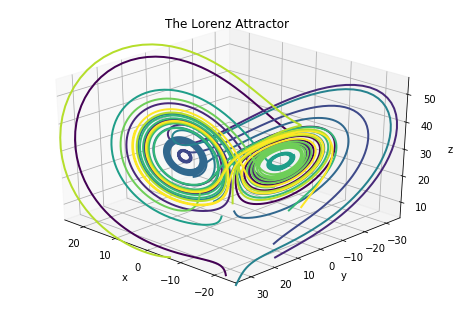

In [138]:
t, x_t = solve_lorenz_graph(angle=134, N=10) #angle initially at 0, butterfly at 134

In [139]:

widget = interactive(solve_lorenz_graph, angle=(0.,360.), max_time=(0.1, 10.0),
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(widget)

A Jupyter Widget

In [140]:
#t, x_t = widget.result

In [141]:
t, x_t = solve_lorenz(N=10) #try 10 random starting point initially, change to 100 later

In [142]:
print ("lorenz output shape : " , x_t.shape)

lorenz output shape :  (10, 1000, 3)


In [143]:
print ("lorenz output : " , x_t)

lorenz output :  [[[-2.48933986e+00  6.60973480e+00 -1.49965688e+01]
  [-2.14077645e+00  6.18646806e+00 -1.48962127e+01]
  [-1.82130748e+00  5.82299967e+00 -1.47853208e+01]
  ...
  [ 6.87667416e+00  1.07734499e+01  1.78286316e+01]
  [ 7.03431517e+00  1.10115546e+01  1.79410297e+01]
  [ 7.19515729e+00  1.12517722e+01  1.80659207e+01]]

 [[-5.93002282e+00 -1.05973233e+01 -1.22298422e+01]
  [-6.13136261e+00 -1.15193465e+01 -1.18344052e+01]
  [-6.36138540e+00 -1.24619735e+01 -1.14104771e+01]
  ...
  [-1.11085203e+01 -1.62261151e+01  2.32341935e+01]
  [-1.13121656e+01 -1.63640151e+01  2.37150767e+01]
  [-1.15128567e+01 -1.64827701e+01  2.42098140e+01]]

 [[-9.41219366e+00 -4.63317819e+00 -3.09697577e+00]
  [-9.24717733e+00 -5.76936651e+00 -2.87083263e+00]
  [-9.13260659e+00 -6.87477643e+00 -2.60897637e+00]
  ...
  [ 8.94933599e+00  1.00204877e+01  2.61339939e+01]
  [ 8.99188828e+00  1.00458891e+01  2.62149083e+01]
  [ 9.03371359e+00  1.00685518e+01  2.62975123e+01]]

 ...

 [[ 1.40478473e+0

## Convert data into format for Keras

In [144]:
# split into train and test sets
train_size = int(len(x_t)* 0.70)
print(train_size)
test_size = len(x_t) - train_size
lorenz_train = x_t[0:train_size]
lorenz_test  = x_t[train_size:len(x_t)]
print ("train shape : " , lorenz_train.shape)
print ("test shape : " , lorenz_test.shape)

7
train shape :  (7, 1000, 3)
test shape :  (3, 1000, 3)


In [145]:

def to_sequences(seq_size, obs): 
    x = []
    y = []
    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [x for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
    return np.array(x),np.array(y)

In [146]:
def to_sequences_ray(seq_size, obs): 
    #x = []
    #y = []
    x, y = to_sequences(SEQUENCE_SIZE,obs[0])
    for i in range(len(obs)):
        xtemp, ytemp = to_sequences(SEQUENCE_SIZE,obs[i])
        x = np.concatenate((x, xtemp), axis=0)
        y = np.concatenate((y, ytemp), axis=0)
        #x.append(xtemp)
        #y.append(ytemp)
    return np.array(x),np.array(y)

In [147]:
data_segment = lorenz_train[1]
print("training data segment shape ", lorenz_train[0].shape)
print("training data segment ", lorenz_train[1])

training data segment shape  (1000, 3)
training data segment  [[ -5.93002282 -10.59732328 -12.22984216]
 [ -6.13136261 -11.51934646 -11.83440517]
 [ -6.3613854  -12.4619735  -11.41047706]
 ...
 [-11.10852032 -16.22611514  23.23419346]
 [-11.31216558 -16.36401507  23.71507674]
 [-11.51285672 -16.48277012  24.20981403]]


In [148]:

#train = np.apply_along_axis(to_sequences_ray, 1, lorenz_train)
print (lorenz_train.shape)
print (lorenz_test.shape)
print (len(lorenz_train))

(7, 1000, 3)
(3, 1000, 3)
7


In [149]:
# reshape input to be [samples, time steps, features]
'''
trainX = np.reshape(lorenz_train, (lorenz_train.shape[0], 1, lorenz_train.shape[1]))
testX = np.reshape(lorenz_test, (lorenz_test.shape[0], 1, lorenz_test.shape[1]))
print(trainX.shape)
print(testX.shape)
'''

'\ntrainX = np.reshape(lorenz_train, (lorenz_train.shape[0], 1, lorenz_train.shape[1]))\ntestX = np.reshape(lorenz_test, (lorenz_test.shape[0], 1, lorenz_test.shape[1]))\nprint(trainX.shape)\nprint(testX.shape)\n'

In [150]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences_ray(SEQUENCE_SIZE,lorenz_train)
#print(lorenz_train)
x_test,y_test = to_sequences_ray(SEQUENCE_SIZE,lorenz_test)
print("Shape of training input: ", x_train.shape)
print ("Shape of training output: " , y_train.shape)
print("Shape of test input: ", x_test.shape)
print ("Shape of testing output: " , y_test.shape)

Shape of training input:  (7912, 10, 3)
Shape of training output:  (7912, 3)
Shape of test input:  (3956, 10, 3)
Shape of testing output:  (3956, 3)


In [151]:
print (x_train[1])

[[ -2.14077645   6.18646806 -14.8962127 ]
 [ -1.82130748   5.82299967 -14.78532082]
 [ -1.52754738   5.5141974  -14.66604305]
 [ -1.25643353   5.25549013 -14.5400914 ]
 [ -1.00519263   5.04282303 -14.40882193]
 [ -0.77130991   4.87261417 -14.27330094]
 [ -0.55250119   4.74171357 -14.1343581 ]
 [ -0.3466877    4.64736514 -13.99262854]
 [ -0.15197325   4.58717161 -13.84858652]
 [  0.03337642   4.55906245 -13.70257219]]


In [152]:
print (y_train[1])

[  0.21095219   4.56126473 -13.55481228]


In [153]:
print (x_test[1])

[[13.30158439 -4.35137818  5.43762841]
 [12.63245662 -3.15868945  5.18607122]
 [12.03537919 -2.01748237  5.00395449]
 [11.50555101 -0.92525235  4.88190821]
 [11.03846858  0.12101607  4.81206154]
 [10.62993013  1.12464381  4.78786651]
 [10.27603255  2.08910202  4.80393473]
 [ 9.97316317  3.01789585  4.85588914]
 [ 9.71798789  3.91447848  4.94023197]
 [ 9.50743691  4.78218811  5.05422845]]


In [154]:
print (y_test[1])

[9.33868889 5.62420225 5.19580543]


## Build Neural Network model in Keras

In [155]:
print('Build LSTM model...')
model = Sequential()
model.add(LSTM(16, input_shape=(None, 3)))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')

Build LSTM model...
Train...


In [156]:
print('Build RNN model...')
RNNmodel = Sequential()
RNNmodel.add(SimpleRNN(16, input_shape=(None, 3)))
RNNmodel.add(Dense(3))
RNNmodel.compile(loss='mean_squared_error', optimizer='adam')
print('Train RNN...')

Build RNN model...
Train RNN...


In [157]:
print('Train LSTM model...')
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=50)

Train LSTM model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/50
 - 5s - loss: 247.0814 - val_loss: 175.8114
Epoch 2/50
 - 4s - loss: 155.2030 - val_loss: 119.7777
Epoch 3/50
 - 4s - loss: 110.8999 - val_loss: 89.1386
Epoch 4/50
 - 4s - loss: 82.5153 - val_loss: 61.9692
Epoch 5/50
 - 5s - loss: 57.3206 - val_loss: 45.8992
Epoch 6/50
 - 5s - loss: 43.1236 - val_loss: 35.1319
Epoch 7/50
 - 5s - loss: 33.2822 - val_loss: 27.4279
Epoch 8/50
 - 4s - loss: 26.2367 - val_loss: 21.8087
Epoch 9/50
 - 4s - loss: 21.1751 - val_loss: 17.6667
Epoch 10/50
 - 4s - loss: 17.4907 - val_loss: 14.4695
Epoch 11/50
 - 4s - loss: 14.7164 - val_loss: 11.9703
Epoch 12/50
 - 4s - loss: 12.5575 - val_loss: 10.0172
Epoch 13/50
 - 4s - loss: 10.7987 - val_loss: 8.4143
Epoch 14/50
 - 4s - loss: 9.3551 - val_loss: 7.1838
Epoch 15/50
 - 4s - loss: 8.1356 - val_loss: 6.0794
Epoch 16/50
 - 4s - loss: 7.0972 - val_loss: 5.1932
Epoch 17/50
 - 4s - loss: 6.2188 - val_loss: 4.5006
Epoch 18/50
 - 4s - loss: 5

In [158]:
print('Train RNN model...')
RNNmodel.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=50)

Train RNN model...
Train on 7912 samples, validate on 3956 samples
Epoch 1/50
 - 2s - loss: 229.3959 - val_loss: 188.1897
Epoch 2/50
 - 1s - loss: 171.6960 - val_loss: 138.3892
Epoch 3/50
 - 1s - loss: 125.6591 - val_loss: 102.8658
Epoch 4/50
 - 1s - loss: 94.2251 - val_loss: 77.4055
Epoch 5/50
 - 1s - loss: 71.7452 - val_loss: 59.3841
Epoch 6/50
 - 1s - loss: 55.3706 - val_loss: 46.2136
Epoch 7/50
 - 1s - loss: 43.1990 - val_loss: 36.1330
Epoch 8/50
 - 1s - loss: 33.9727 - val_loss: 28.6132
Epoch 9/50
 - 1s - loss: 27.2258 - val_loss: 23.0627
Epoch 10/50
 - 1s - loss: 22.2416 - val_loss: 18.8192
Epoch 11/50
 - 1s - loss: 18.5110 - val_loss: 15.5140
Epoch 12/50
 - 1s - loss: 15.7026 - val_loss: 12.9223
Epoch 13/50
 - 1s - loss: 13.4755 - val_loss: 10.8597
Epoch 14/50
 - 1s - loss: 11.6766 - val_loss: 9.1953
Epoch 15/50
 - 1s - loss: 10.1993 - val_loss: 7.8696
Epoch 16/50
 - 1s - loss: 8.9556 - val_loss: 6.7827
Epoch 17/50
 - 1s - loss: 7.8861 - val_loss: 5.8298
Epoch 18/50
 - 1s - loss

## Plot original values and predictions

In [159]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)
RNNtrainPredict = RNNmodel.predict(x_train)
RNNtestPredict = RNNmodel.predict(x_test)

Graphing LSTM and RNN on Training data 


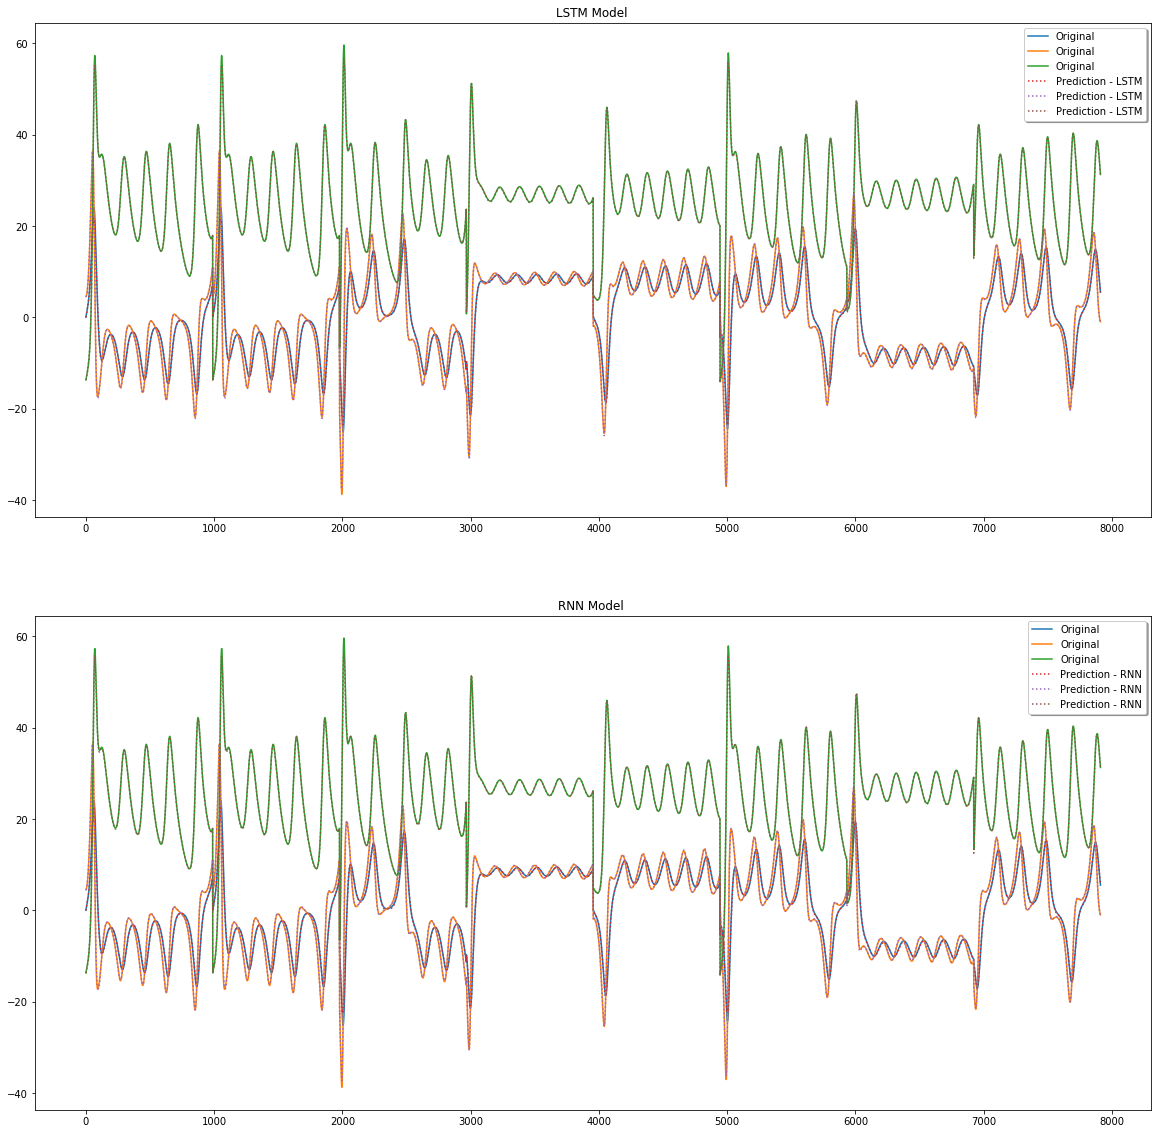

In [160]:
from matplotlib import pyplot as plt
# plot baseline and predictions
print("Graphing LSTM and RNN on Training data ")
plt.figure(figsize=(20,20))
plt.subplot(2 ,1, 1)
plt.title("LSTM Model ")
plt.plot(y_train, linestyle='-', label='Original')
plt.plot(trainPredict, linestyle=':', label='Prediction - LSTM')
plt.legend(loc='upper right', shadow=True)

plt.subplot(2, 1, 2)
plt.title("RNN Model ")
plt.plot(y_train, linestyle='-', label='Original')
plt.plot(RNNtrainPredict, linestyle=':', label='Prediction - RNN')
plt.legend(loc='upper right', shadow=True)
plt.show()


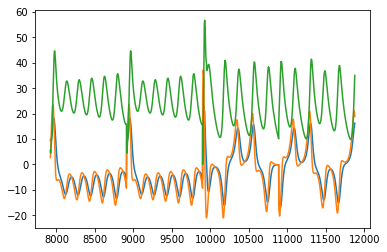

In [161]:
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list, testPredict) # plot baseline and predictions

In [162]:
print(trainPredict-y_train)

[[ 0.06328719 -0.01990887  0.017711  ]
 [ 0.06510222 -0.01188204 -0.03015533]
 [ 0.0710369  -0.01651554 -0.05969445]
 ...
 [-0.01656264 -0.08808654 -0.12706318]
 [-0.01564781 -0.08589657 -0.1309928 ]
 [-0.01379701 -0.08293202 -0.13459584]]


## Calculate difference between prediction and actual

Graphing LSTM true test output against predicted output 


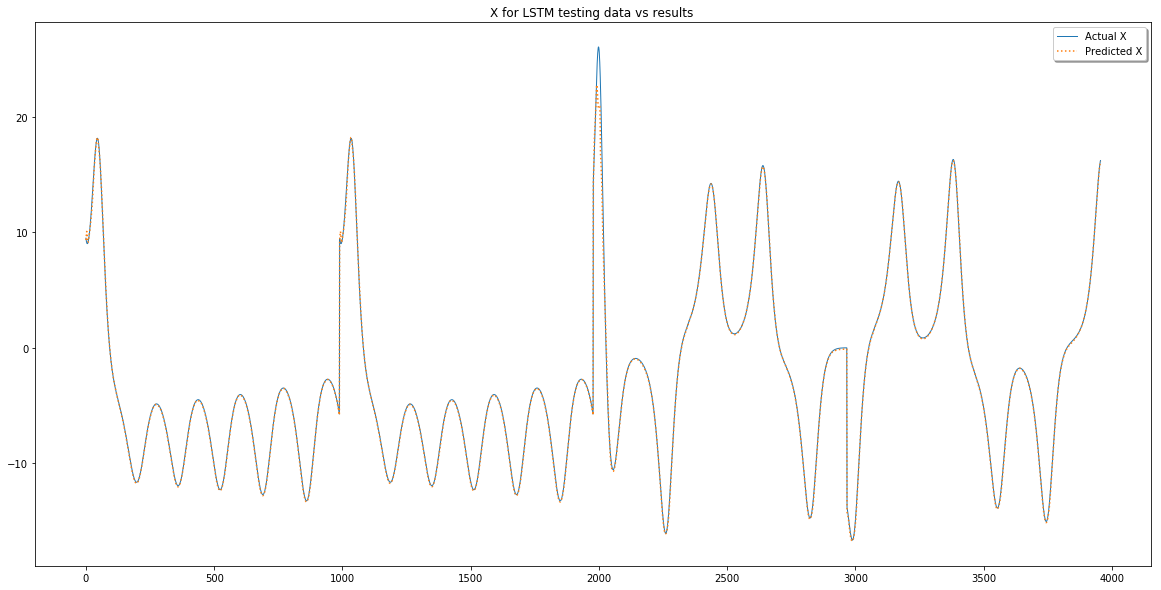

In [163]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for LSTM testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


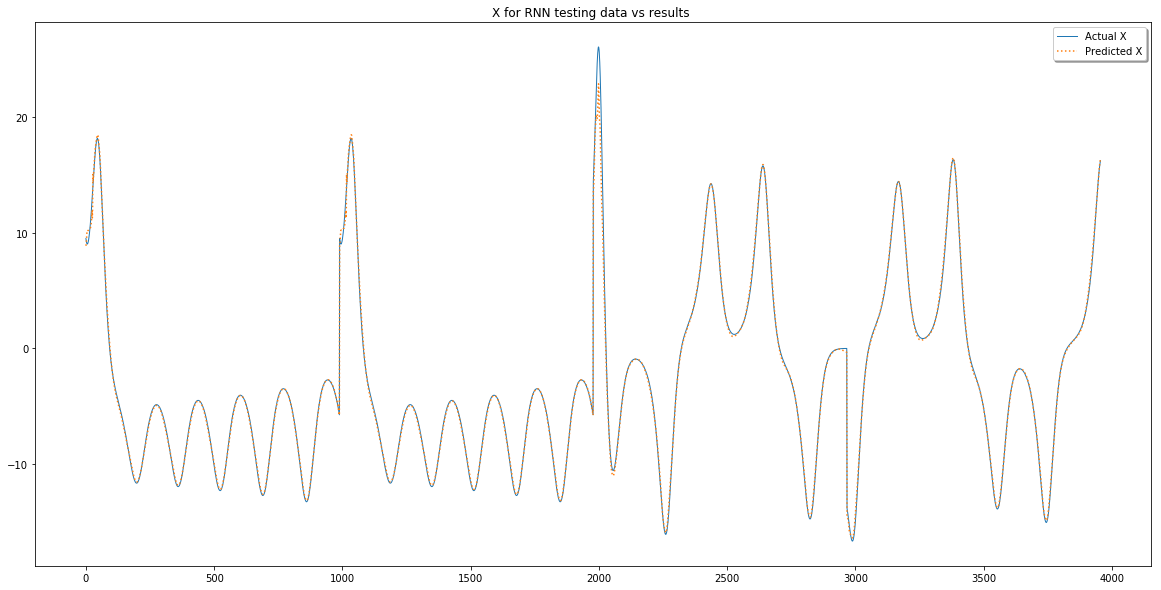

In [164]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("X for RNN testing data vs results ")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(RNNtestPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing LSTM true test output against predicted output 


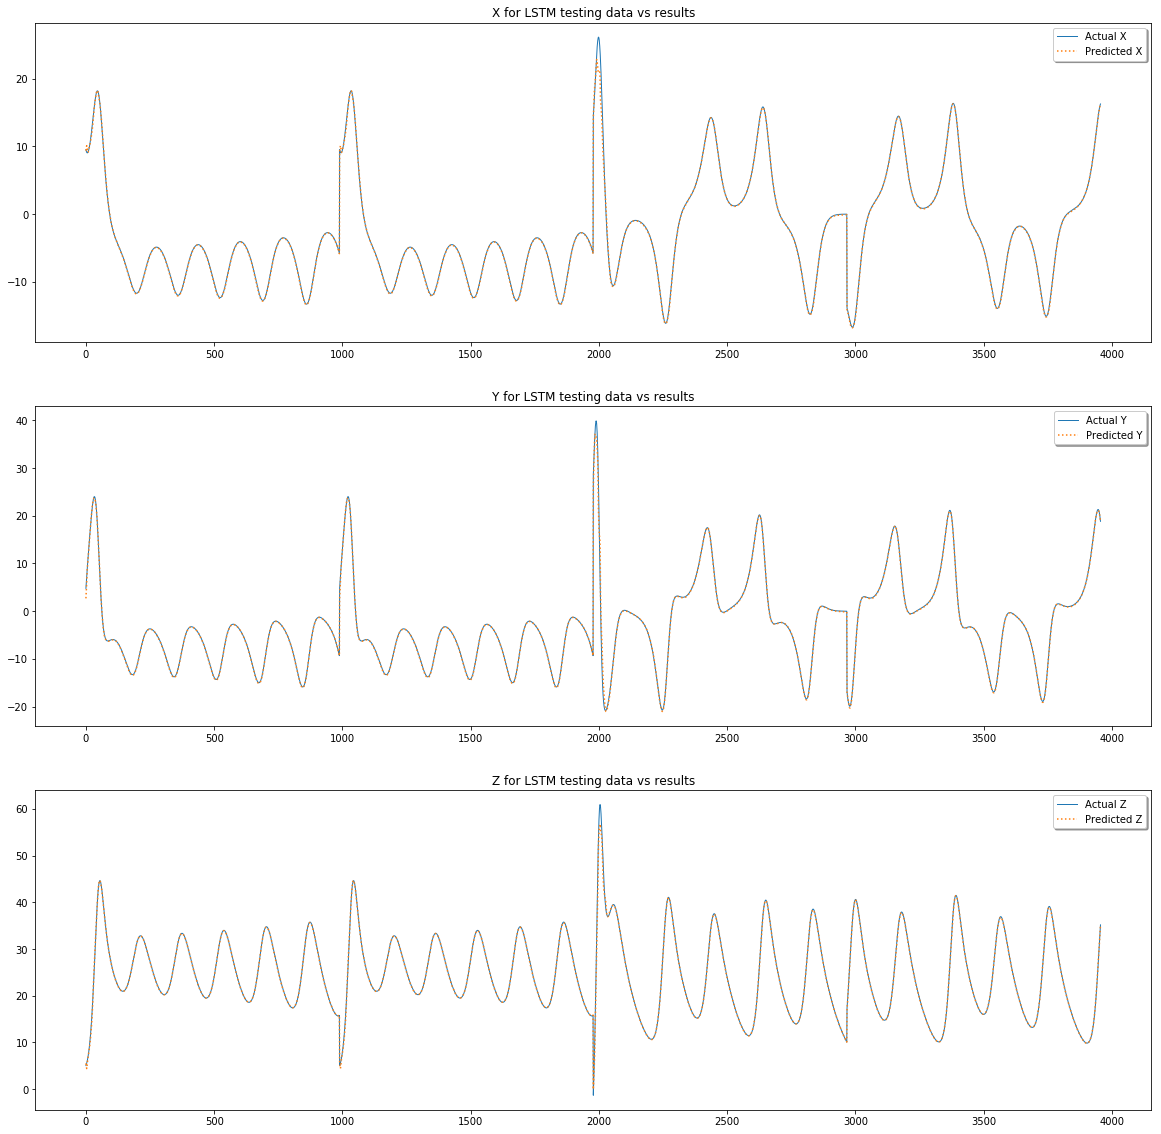

In [165]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X for LSTM testing data vs results")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y for LSTM testing data vs results")
plt.plot(y_test[:,1:2], linewidth=1.0, label='Actual Y')
plt.plot(testPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z for LSTM testing data vs results")
plt.plot(y_test[:,2:3], linewidth=1.0, label='Actual Z')
plt.plot(testPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


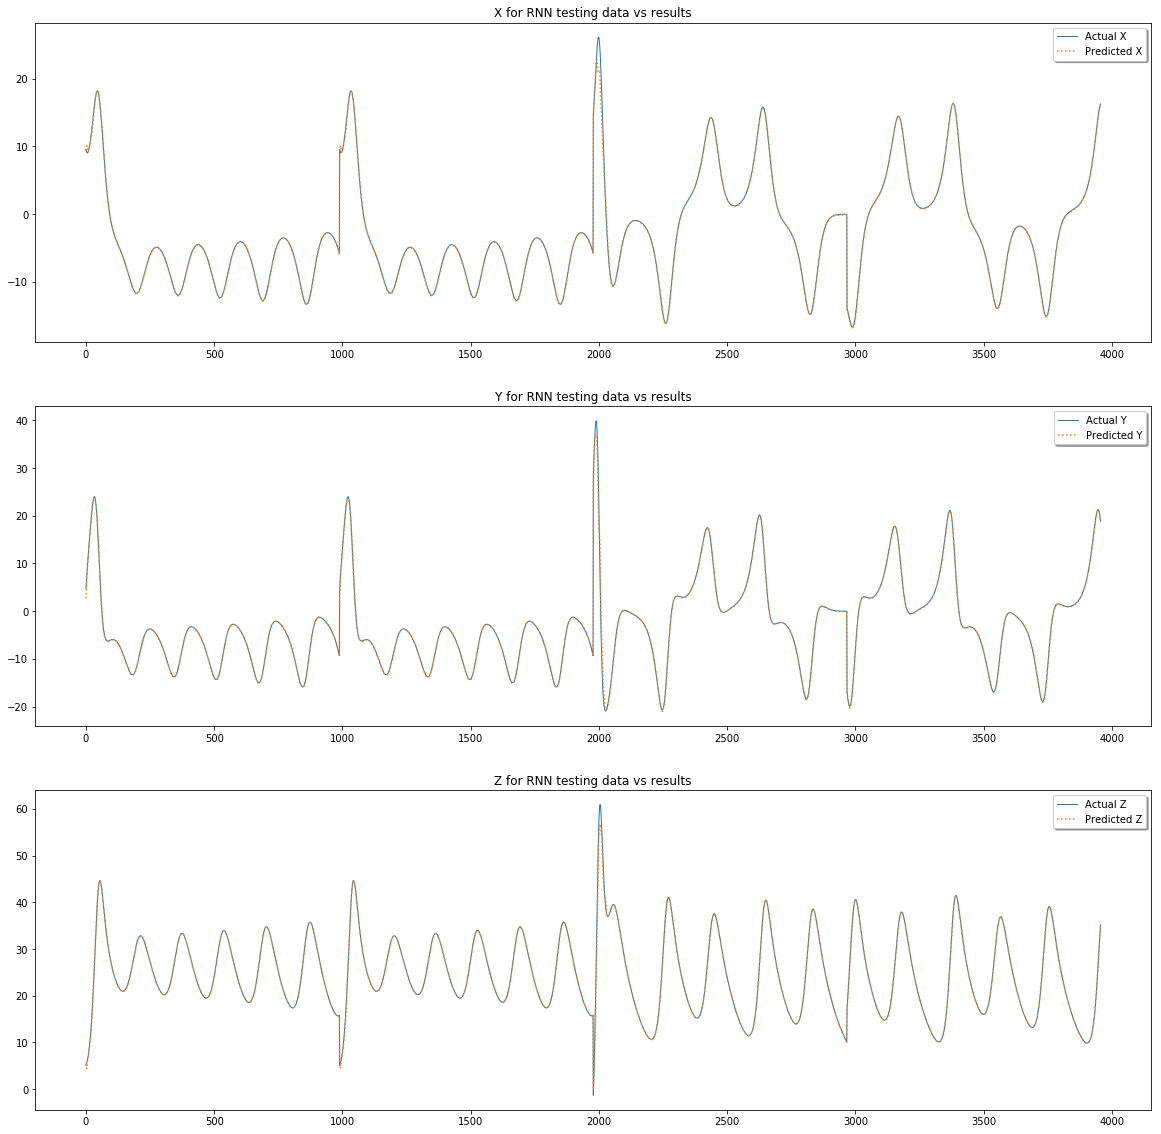

In [166]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X for RNN testing data vs results")
plt.plot(y_test[:,0:1], linewidth=1.0, label='Actual X')
plt.plot(testPredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y for RNN testing data vs results")
plt.plot(y_test[:,1:2], linewidth=1.0, label='Actual Y')
plt.plot(testPredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z for RNN testing data vs results")
plt.plot(y_test[:,2:3], linewidth=1.0, label='Actual Z')
plt.plot(testPredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [167]:
print (y_test.shape)
print (y_test)

(3956, 3)
[[ 9.50743691  4.78218811  5.05422845]
 [ 9.33868889  5.62420225  5.19580543]
 [ 9.20915422  6.44350491  5.36346359]
 ...
 [15.98936717 19.81395459 33.41044267]
 [16.1306741  19.35847338 34.30881879]
 [16.2473985  18.84463462 35.17646154]]


In [168]:
y_test_win = [[x] for x in y_test]
y_test_win = np.array(y_test_win)
print (y_test_win.shape)
print (y_test_win)

(3956, 1, 3)
[[[ 9.50743691  4.78218811  5.05422845]]

 [[ 9.33868889  5.62420225  5.19580543]]

 [[ 9.20915422  6.44350491  5.36346359]]

 ...

 [[15.98936717 19.81395459 33.41044267]]

 [[16.1306741  19.35847338 34.30881879]]

 [[16.2473985  18.84463462 35.17646154]]]


In [169]:
print (testPredict.shape)
print (testPredict)

(3956, 3)
[[ 9.346966   2.6856344  5.536276 ]
 [ 9.630635   3.6730912  5.1300554]
 [ 9.91408    4.756963   4.664407 ]
 ...
 [15.9475765 19.763496  33.215965 ]
 [16.090195  19.314365  34.12596  ]
 [16.202255  18.795404  35.015697 ]]


In [170]:
test_diff = testPredict-y_test_win
print(testPredict-y_test_win)

[[[-1.60471117e-01 -2.09655374e+00  4.82047409e-01]
  [ 1.23198355e-01 -1.10909694e+00  7.58269726e-02]
  [ 4.06642759e-01 -2.52253339e-02 -3.89821679e-01]
  ...
  [ 6.44013962e+00  1.49813083e+01  2.81617368e+01]
  [ 6.58275780e+00  1.45321773e+01  2.90717328e+01]
  [ 6.69481834e+00  1.40132163e+01  2.99614690e+01]]

 [[ 8.27689817e-03 -2.93856787e+00  3.40470437e-01]
  [ 2.91946370e-01 -1.95111107e+00 -6.57499988e-02]
  [ 5.75390775e-01 -8.67239469e-01 -5.31398650e-01]
  ...
  [ 6.60888763e+00  1.41392942e+01  2.80201598e+01]
  [ 6.75150581e+00  1.36901631e+01  2.89301559e+01]
  [ 6.86356636e+00  1.31712022e+01  2.98198921e+01]]

 [[ 1.37811571e-01 -3.75787053e+00  1.72812271e-01]
  [ 4.21481042e-01 -2.77041374e+00 -2.33408165e-01]
  [ 7.04925447e-01 -1.68654213e+00 -6.99056816e-01]
  ...
  [ 6.73842230e+00  1.33199915e+01  2.78525017e+01]
  [ 6.88104048e+00  1.28708605e+01  2.87624977e+01]
  [ 6.99310103e+00  1.23518995e+01  2.96522339e+01]]

 ...

 [[-6.64240138e+00 -1.71283202e+01

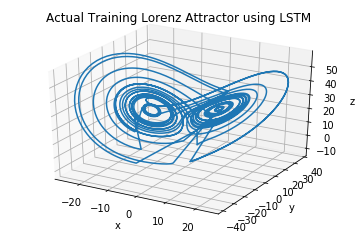

In [171]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Actual Training Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(y_train[:,0],y_train[:,1],y_train[:,2])
plt.show()

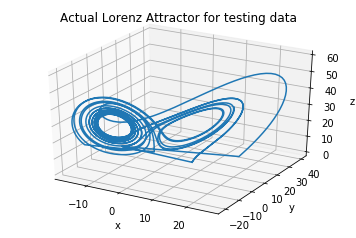

In [172]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Actual Lorenz Attractor for testing data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(y_test[:,0],y_test[:,1],y_test[:,2])
plt.show()

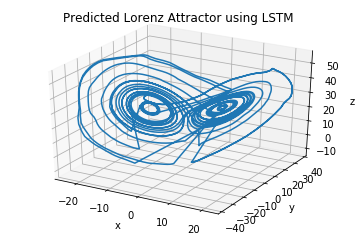

In [173]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(trainPredict[:,0],trainPredict[:,1],trainPredict[:,2])
plt.show()

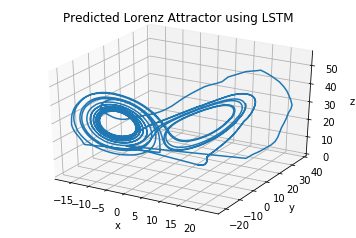

In [174]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using LSTM')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(testPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

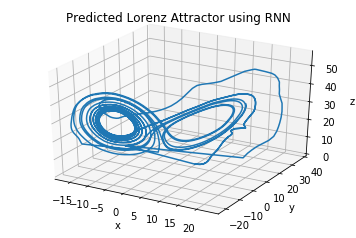

In [175]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title('Predicted Lorenz Attractor using RNN')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(RNNtestPredict[:,0],testPredict[:,1],testPredict[:,2])
plt.show()

## Testing with single starting point - predicting 1 ahead

In [176]:
SEQUENCE_SIZE = 10
single_t, single_lor = solve_lorenz(N=1) #try 10 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
singlePredict = model.predict(single_x)
RNNsinglePredict = RNNmodel.predict(single_x)
print ("Shape of data: ", single_lor.shape)
print ("Shape of windowed data: ", single_x.shape)

Shape of data:  (1, 1000, 3)
Shape of windowed data:  (1978, 10, 3)


Graphing LSTM true test output against predicted output 


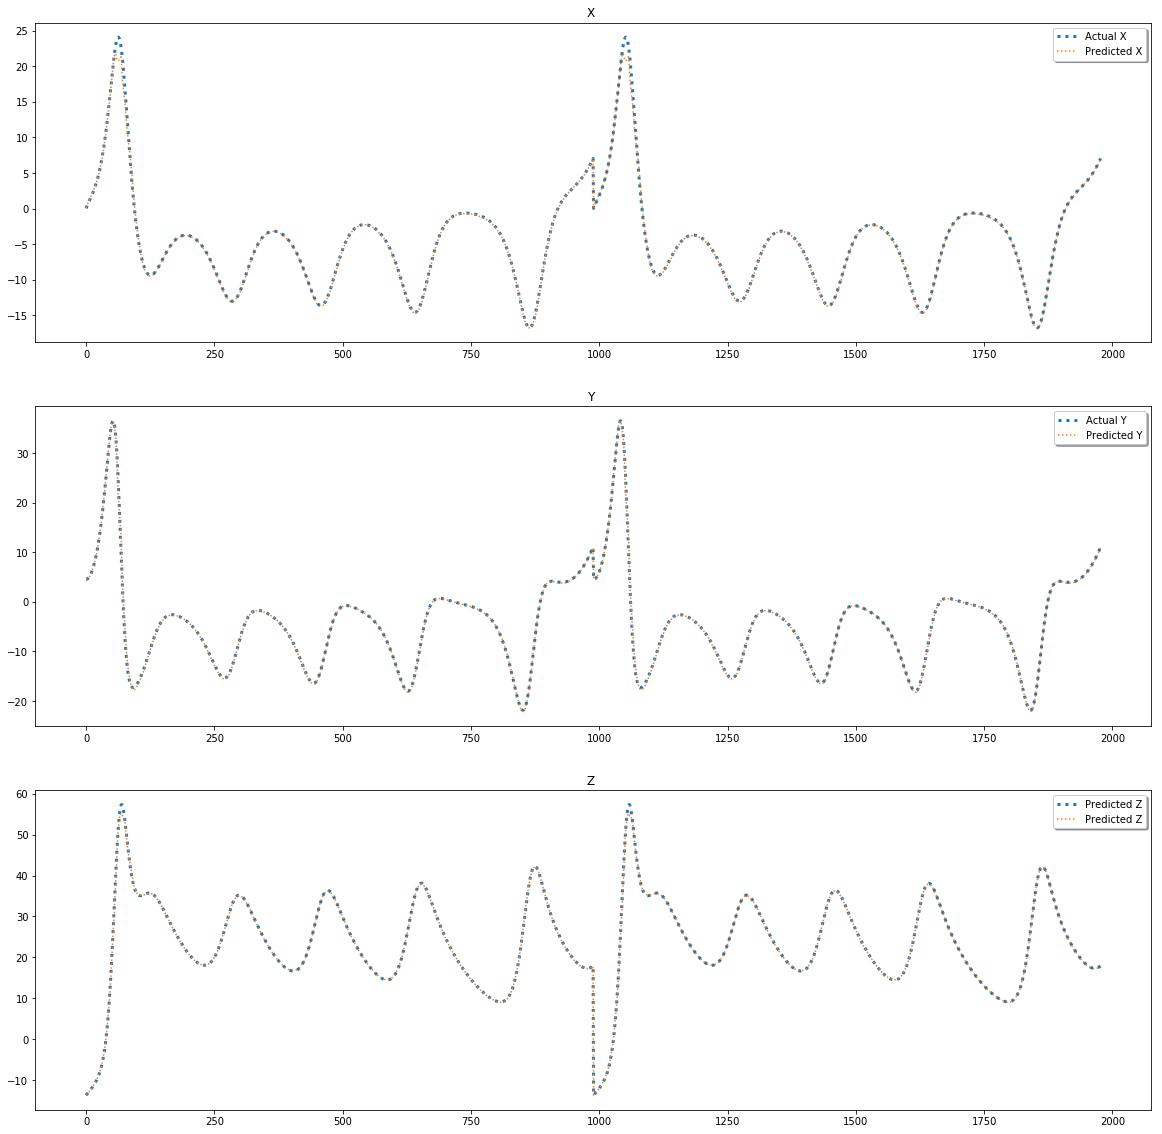

In [177]:
print("Graphing LSTM true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X')
plt.plot(singlePredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(singlePredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Predicted Z')
plt.plot(singlePredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

Graphing RNN true test output against predicted output 


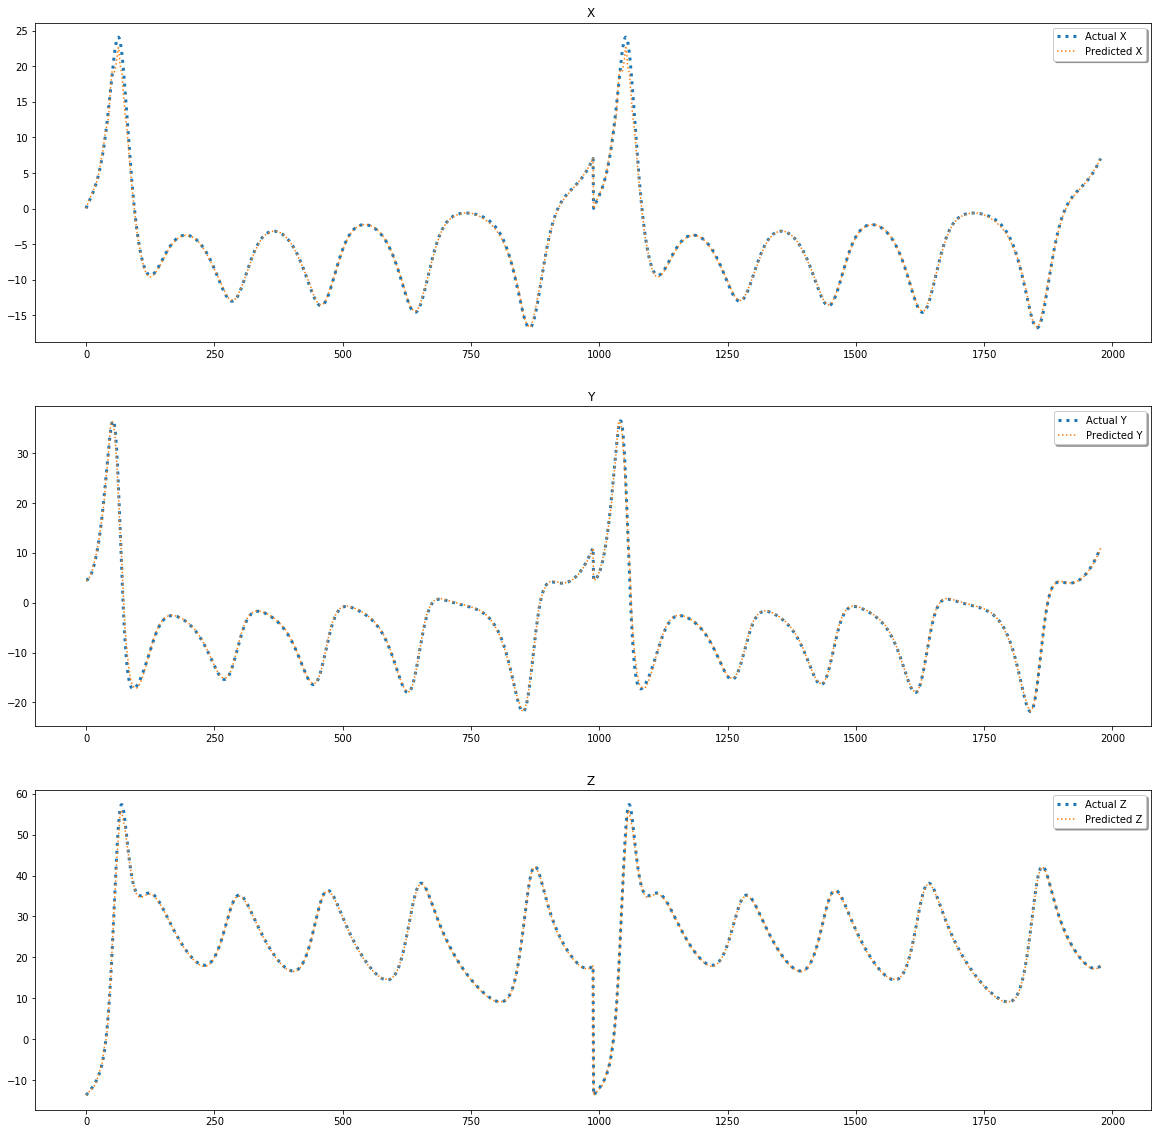

In [178]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X' )
plt.plot(RNNsinglePredict[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(RNNsinglePredict[:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Actual Z')
plt.plot(RNNsinglePredict[:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [179]:
print ("Calculating LSTM error with single time series")
print("Shape of output: ",single_y.shape)
err3D = single_y - singlePredict
err1D = (single_y - singlePredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating LSTM error with single time series
Shape of output:  (1978, 3)
Average error =  0.24659513752559784


In [180]:
print ("Calculating RNN error with single time series")
print("Shape of output: ",single_y.shape)
RNNerr3D = single_y - RNNsinglePredict
RNNerr1D = (single_y - RNNsinglePredict)**2
RNNerr1D = RNNerr1D.sum(axis=-1)
RNNerr1D = np.sqrt(RNNerr1D)
RNNaveErr = np.average(RNNerr1D)
print("Average error = ", RNNaveErr)

Calculating RNN error with single time series
Shape of output:  (1978, 3)
Average error =  0.3767183953717293


Graphing true test output against predicted output 


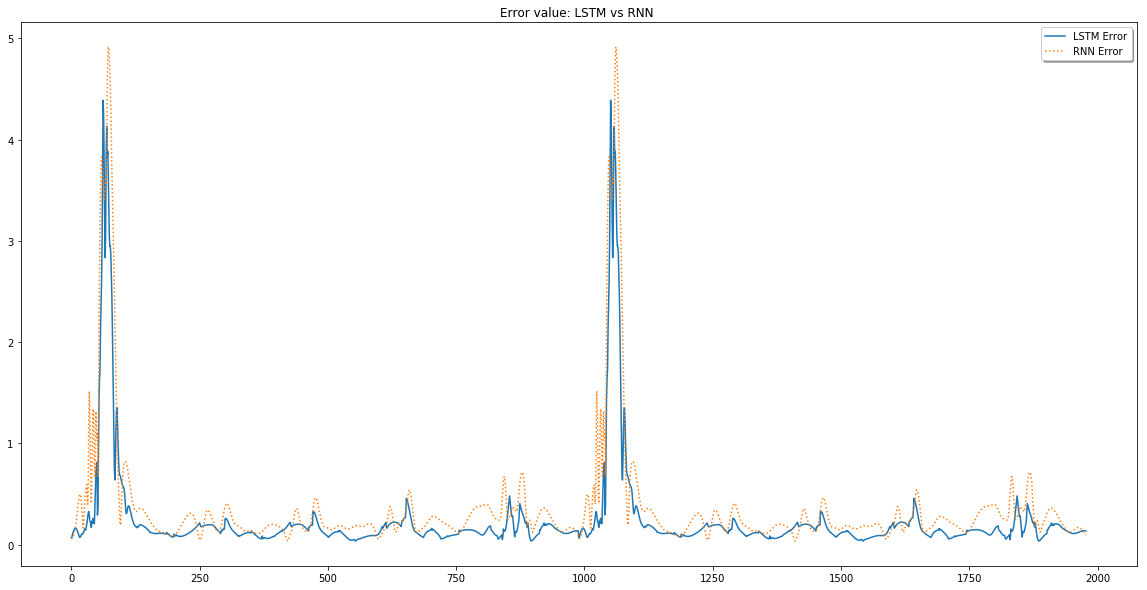

In [181]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("Error value: LSTM vs RNN ")
plt.plot(err1D, linestyle='-', label='LSTM Error')
plt.plot(RNNerr1D, linestyle=':', label='RNN Error')
plt.legend(loc='upper right', shadow=True)
plt.show()

## Testing with single starting point - predicting 5 steps ahead

In [182]:

SEQUENCE_SIZE = 10
PREDICTION_LENGTH = 20
single_t, single_lor = solve_lorenz(N=1) #try 1 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
pattern = single_x[1]
print ("Shape of  input data: ", single_x.shape)
print ("Shape of  pattern: ", pattern.shape)
pattern = pattern.reshape(1,SEQUENCE_SIZE,3)
prediction = pattern

print ("Shape of  input data: ", single_x.shape)
print ("Shape of  pattern: ", pattern.shape)
print ("Shape of  prediction data: ", prediction.shape)
next = model.predict(pattern)
print("next : ", next.shape)
nextNum = next[0]
print("next number: ", nextNum.shape)
nextNum = nextNum.reshape(1,1,3)
pattern = np.concatenate((pattern, nextNum), axis=1)
prediction = np.concatenate((prediction, nextNum), axis=1)
print ("Shape of  pattern: ", pattern.shape)
pattern = pattern[0:,1:len(pattern),0:]
print ("Shape of  pattern: ", pattern.shape)
print ("Shape of  prediction data: ", prediction.shape)

Shape of  input data:  (1978, 10, 3)
Shape of  pattern:  (10, 3)
Shape of  input data:  (1978, 10, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 10, 3)
next :  (1, 3)
next number:  (3,)
Shape of  pattern:  (1, 11, 3)
Shape of  pattern:  (1, 0, 3)
Shape of  prediction data:  (1, 11, 3)


In [183]:
'''
pattern = pattern[1:len(pattern)]
pattern = pattern.reshape(1,SEQUENCE_SIZE,3)
print ("Shape of  pattern: ", pattern.shape)
print ("Shape of  prediction data: ", prediction.shape)
'''

'\npattern = pattern[1:len(pattern)]\npattern = pattern.reshape(1,SEQUENCE_SIZE,3)\nprint ("Shape of  pattern: ", pattern.shape)\nprint ("Shape of  prediction data: ", prediction.shape)\n'

In [184]:
# Improved version
SEQUENCE_SIZE = 10
PREDICTION_LENGTH = 2000
single_t, single_lor = solve_lorenz(N=1) #try 1 random starting point initially, chnage to 100 later
single_x, single_y  = to_sequences_ray(SEQUENCE_SIZE,single_lor)
pattern = single_x[1]
pattern = pattern.reshape(1,SEQUENCE_SIZE,3)
prediction = pattern
for i in range(PREDICTION_LENGTH):
    next = model.predict(pattern)
    #print("next : ", next.shape)
    nextNum = next[0]
    #print("next number: ", nextNum.shape)
    nextNum = nextNum.reshape(1,1,3)
    pattern = np.concatenate((pattern, nextNum), axis=1)
    prediction = np.concatenate((prediction, nextNum), axis=1)
    #print ("Shape of  pattern: ", pattern.shape)
    pattern = pattern[0:,1:SEQUENCE_SIZE+1,0:]
    print ("Shape of  pattern: ", pattern.shape)
    print ("Shape of  prediction data: ", prediction.shape)

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 11, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 12, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 13, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 14, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 15, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 16, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 17, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 18, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 19, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 20, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 21, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 22, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 23, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 24, 3)
Shape of  pattern:  

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 129, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 130, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 131, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 132, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 133, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 134, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 135, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 136, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 137, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 138, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 139, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 140, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 141, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 142, 3)
Shape 

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 256, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 257, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 258, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 259, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 260, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 261, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 262, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 263, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 264, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 265, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 266, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 267, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 268, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 269, 3)
Shape 

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 391, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 392, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 393, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 394, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 395, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 396, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 397, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 398, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 399, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 400, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 401, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 402, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 403, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 404, 3)
Shape 

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 540, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 541, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 542, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 543, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 544, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 545, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 546, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 547, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 548, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 549, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 550, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 551, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 552, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 553, 3)
Shape 

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 660, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 661, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 662, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 663, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 664, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 665, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 666, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 667, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 668, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 669, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 670, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 671, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 672, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 673, 3)
Shape 

Shape of  prediction data:  (1, 796, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 797, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 798, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 799, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 800, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 801, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 802, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 803, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 804, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 805, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 806, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 807, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 808, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 809, 3)
Shape of  pattern:  (1, 10, 3)
Shape 

Shape of  prediction data:  (1, 923, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 924, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 925, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 926, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 927, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 928, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 929, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 930, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 931, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 932, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 933, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 934, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 935, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 936, 3)
Shape of  pattern:  (1, 10, 3)
Shape 

Shape of  prediction data:  (1, 1051, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1052, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1053, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1054, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1055, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1056, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1057, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1058, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1059, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1060, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1061, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1062, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1063, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1064, 3)
Shape of  pattern:  (1,

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1178, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1179, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1180, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1181, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1182, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1183, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1184, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1185, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1186, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1187, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1188, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1189, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1190, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1316, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1317, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1318, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1319, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1320, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1321, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1322, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1323, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1324, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1325, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1326, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1327, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1328, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1444, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1445, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1446, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1447, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1448, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1449, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1450, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1451, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1452, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1453, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1454, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1455, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1456, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1576, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1577, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1578, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1579, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1580, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1581, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1582, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1583, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1584, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1585, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1586, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1587, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1588, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1

Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1726, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1727, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1728, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1729, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1730, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1731, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1732, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1733, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1734, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1735, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1736, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1737, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1738, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1

Shape of  prediction data:  (1, 1872, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1873, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1874, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1875, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1876, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1877, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1878, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1879, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1880, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1881, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1882, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1883, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1884, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 1885, 3)
Shape of  pattern:  (1,

Shape of  prediction data:  (1, 2005, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 2006, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 2007, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 2008, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 2009, 3)
Shape of  pattern:  (1, 10, 3)
Shape of  prediction data:  (1, 2010, 3)


In [185]:
print ("Shape of  actual: ", single_y.shape)
prediction = prediction.reshape(SEQUENCE_SIZE+PREDICTION_LENGTH,3)
print ("Shape of  prediction: ", prediction.shape)

Shape of  actual:  (1978, 3)
Shape of  prediction:  (2010, 3)


Graphing RNN true test output against predicted output 


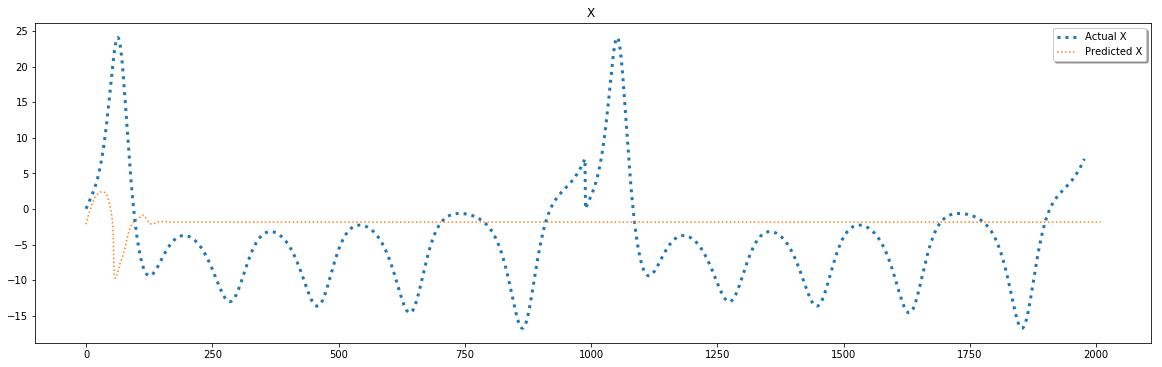

In [186]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X' )
plt.plot(prediction[:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

Graphing RNN true test output against predicted output 


IndexError: too many indices for array

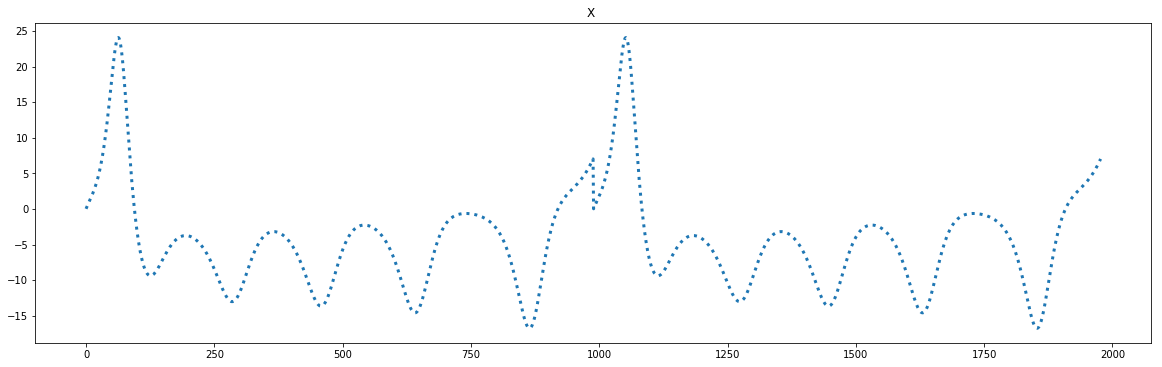

In [187]:
print("Graphing RNN true test output against predicted output ")
plt.figure(figsize=(20,20))
plt.subplot(3 ,1, 1)
plt.title("X ")
plt.plot(single_y[:,0:1], linewidth=3.0, linestyle=':', label='Actual X' )
plt.plot(prediction[1,:,0:1], linestyle=':', label='Predicted X')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 2)
plt.title("Y ")
plt.plot(single_y[:,1:2], linewidth=3.0, linestyle=':', label='Actual Y')
plt.plot(prediction[1,:,1:2], linestyle=':', label='Predicted Y')
plt.legend(loc='upper right', shadow=True)

plt.subplot(3, 1, 3)
plt.title("Z ")
plt.plot(single_y[:,2:3], linewidth=3.0, linestyle=':', label='Actual Z')
plt.plot(prediction[1,:,2:3], linestyle=':', label='Predicted Z')
plt.legend(loc='upper right', shadow=True)
plt.show()

In [188]:
print ("Calculating LSTM error with single time series")
print("Shape of output: ",single_y.shape)
err3D = single_y - singlePredict
err1D = (single_y - singlePredict)**2
err1D = err1D.sum(axis=-1)
err1D = np.sqrt(err1D)
aveErr = np.average(err1D)
print("Average error = ", aveErr)

Calculating LSTM error with single time series
Shape of output:  (1978, 3)
Average error =  0.24659513752559784


In [189]:
print ("Calculating RNN error with single time series")
print("Shape of output: ",single_y.shape)
RNNerr3D = single_y - RNNsinglePredict
RNNerr1D = (single_y - RNNsinglePredict)**2
RNNerr1D = RNNerr1D.sum(axis=-1)
RNNerr1D = np.sqrt(RNNerr1D)
RNNaveErr = np.average(RNNerr1D)
print("Average error = ", RNNaveErr)

Calculating RNN error with single time series
Shape of output:  (1978, 3)
Average error =  0.3767183953717293


Graphing true test output against predicted output 


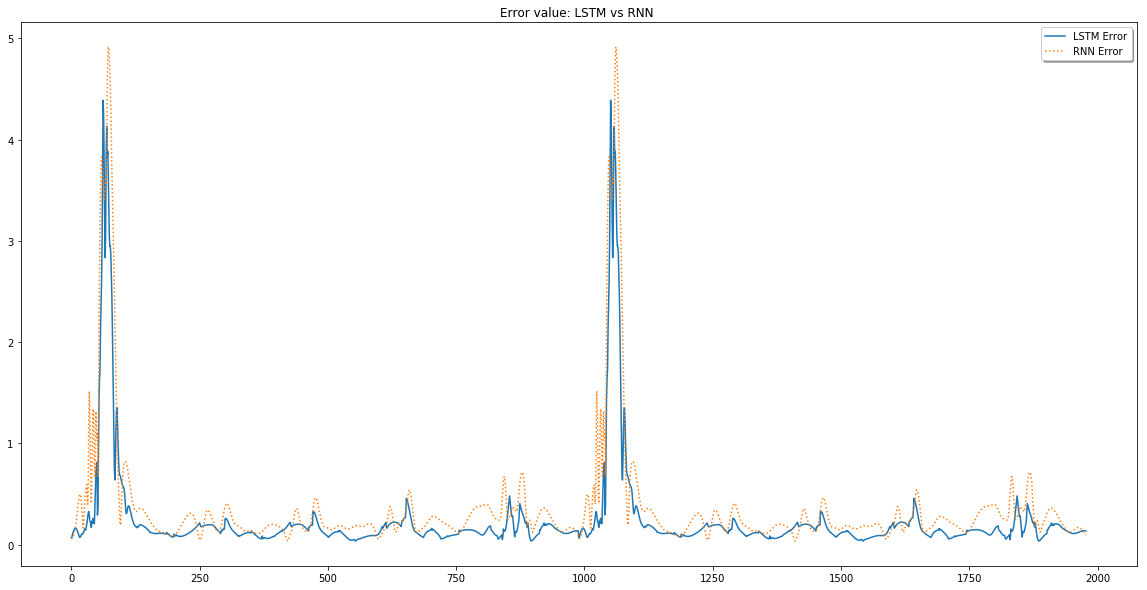

In [190]:
print("Graphing true test output against predicted output ")
plt.figure(figsize=(20,10))
plt.title("Error value: LSTM vs RNN ")
plt.plot(err1D, linestyle='-', label='LSTM Error')
plt.plot(RNNerr1D, linestyle=':', label='RNN Error')
plt.legend(loc='upper right', shadow=True)
plt.show()


References: 
1. http://ipywidgets.readthedocs.io/en/latest/examples/Lorenz%20Differential%20Equations.html
2. https://github.com/mspieg/dynamical-systems/blob/master/LorenzEquations.ipynb
3. https://en.wikipedia.org/wiki/List_of_dynamical_systems_and_differential_equations_topics
4. http://ipython-books.github.io/chapter-12-deterministic-dynamical-systems/
http://ipython-books.github.io/
5. http://adventuresinmachinelearning.com/recurrent-neural-networks-lstm-tutorial-tensorflow/
6. http://iamtrask.github.io/2015/11/15/anyone-can-code-lstm/
7. http://colah.github.io/posts/2015-08-Understanding-LSTMs/
8. http://www.iro.umontreal.ca/~lisa/pointeurs/RazvanPascanuThesis.pdf (also in downloads)
9. https://www.gribblelab.org/compneuro/2_Modelling_Dynamical_Systems.html#orgheadline5 
10. https://blog.statsbot.co/time-series-prediction-using-recurrent-neural-networks-lstms-807fa6ca7f
11. https://github.com/yuqirose/trnn poster - http://roseyu.com/Materials/nips17-tsw-poster.pdf
12. https://machinelearningmastery.com/prepare-univariate-time-series-data-long-short-term-memory-networks/